# Generate  Boxplot
- Expects a CSV with data already computed

In [1]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/luo_gait_2025/gait_optimization_patients.xlsx'
sheet = "Sheet1"

In [2]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/luo_gait_2025/results/prelim_result_boxplot'

In [6]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
df = cal_palm.read_and_display_data()
df

,MRN,Subject,Trial,Setting,var_3MinWalkTest__s_,Total_Time_Frozen__s_,Total_Time_Turning__s_,Total_Time_in_Sit_Stand_Transition__s_,Total_Time_Turning_Right__s_,Total_Time_Turning_Left__s_,...,Sensory_Gait__H_S__w_eyes_closed_,Hemiparetic_Gait__UMN_signs__paretic_,Steppage_Gait__Steppage__foot_drop_,Rigid___Dystonic_Gait,Did_this_improve_your_gait__Y_N_M__,Did_this_improve_your_freezing__Y_N_M_,Did_it_improve_ability_to_get_started__Y_N_M_,Notes,On_Med,Rigidity
0,NaN,1,1.0,fMRI,31.0,3.0,3.0,7.0,20.0,11.0,...,0.0,0.0,0.0,NaN,M,M,M,Clinician agrees is improved compared to clini...,0.0,1+
1,NaN,1,2.0,Clinical,45.0,14.0,8.0,20.0,20.0,20.0,...,0.0,0.0,0.0,NaN,M,M,M,NaN,0.0,1+
2,NaN,1,NaN,tract,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left sided DBS. No tracts available. 3 setting...,NaN,NaN
3,NaN,2,1.0,fMRI,74.0,10.0,5.0,5.0,NaN,NaN,...,0.0,0.0,0.0,NaN,M,Y,Y,NaN,0.0,NaN
4,NaN,2,2.0,Clinical,90.0,25.0,14.0,5.0,NaN,NaN,...,0.0,0.0,0.0,NaN,M,N,N,NaN,0.0,NaN
5,NaN,2,NaN,tract,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPI DBS. No tracts available.,NaN,NaN
6,NaN,3,2.0,fMRI,23.0,1.0,4.0,8.0,6.0,8.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,3,3.0,fMRI (raw),20.0,0.0,1.0,1.0,6.0,6.0,...,0.0,0.0,1.0,0.0,Y,Y,Y,NaN,NaN,NaN
8,NaN,3,1.0,Clinical,23.0,1.0,4.0,8.0,6.0,8.0,...,0.0,0.0,0.0,1.0,N,N,NaN,Dystonia in l/R LE,NaN,"2+ RLE, 0 thers"
9,NaN,3,NaN,tract,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Set the parameters for dropping rows

In [12]:
df.columns

Index(['MRN', 'Subject', 'Trial', 'Setting', 'Walk Time  (s) ',
       'Total Time Frozen  (s) ', 'Total Time Turning  (s) ',
       'Total Time in Sit Stand Transition  (s) ',
       'Total Time Turning Right  (s) ', 'Total Time Turning Left  (s) ',
       'Asymmetric Gait Present', 'Gait Instability Present',
       'Wide Base Present',
       'Parkinsonian Gait  (s)low  (s)huffling  hesitant  freeze ',
       'Ataxic Gait  Incoord Veering H S   ',
       'Sensory Gait  H S  w eyes closed ',
       'Hemiparetic Gait  UMN (s)igns  paretic ',
       'Steppage Gait  Steppage  foot drop ', 'Rigid   Dystonic Gait',
       'Did this improve your gait  Y N M  ',
       'Did this improve your freezing  Y N M ',
       'Did it improve ability to get (s)tarted  Y N M ', 'Notes', 'On Med',
       'Rigidity'],
      dtype='object')

In [13]:
column = 'Setting'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'tract' # The value to drop if found

In [14]:
df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(df)

,MRN,Subject,Trial,Setting,Walk Time (s),Total Time Frozen (s),Total Time Turning (s),Total Time in Sit Stand Transition (s),Total Time Turning Right (s),Total Time Turning Left (s),...,Sensory Gait H S w eyes closed,Hemiparetic Gait UMN (s)igns paretic,Steppage Gait Steppage foot drop,Rigid Dystonic Gait,Did this improve your gait Y N M,Did this improve your freezing Y N M,Did it improve ability to get (s)tarted Y N M,Notes,On Med,Rigidity
0,NaN,1,1.0,fMRI,31.0,3.0,3.0,7.0,20.0,11.0,...,0.0,0.0,0.0,NaN,M,M,M,Clinician agrees is improved compared to clini...,0.0,1+
1,NaN,1,2.0,Clinical,45.0,14.0,8.0,20.0,20.0,20.0,...,0.0,0.0,0.0,NaN,M,M,M,NaN,0.0,1+
3,NaN,2,1.0,fMRI,74.0,10.0,5.0,5.0,NaN,NaN,...,0.0,0.0,0.0,NaN,M,Y,Y,NaN,0.0,NaN
4,NaN,2,2.0,Clinical,90.0,25.0,14.0,5.0,NaN,NaN,...,0.0,0.0,0.0,NaN,M,N,N,NaN,0.0,NaN
6,NaN,3,2.0,fMRI,23.0,1.0,4.0,8.0,6.0,8.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,3,3.0,fMRI (raw),20.0,0.0,1.0,1.0,6.0,6.0,...,0.0,0.0,1.0,0.0,Y,Y,Y,NaN,NaN,NaN
8,NaN,3,1.0,Clinical,23.0,1.0,4.0,8.0,6.0,8.0,...,0.0,0.0,0.0,1.0,N,N,NaN,Dystonia in l/R LE,NaN,"2+ RLE, 0 thers"


**Remove Columns**

In [4]:
cols_to_drop = ['var_3MinWalkTest__s_', 'Total_Time_Frozen__s_', 'Total_Time_Turning__s_', 'Total_Time_in_Sit_Stand_Transition__s_']

In [5]:
for col in cols_to_drop:
    df.pop(col)

**Manage Cols**

In [11]:
newcols = []
for i, col in enumerate(df.columns):
    newcols.append(col.replace("3MinWalkTest", "Walk Time"))
df.columns = newcols
df

,MRN,Subject,Trial,Setting,Walk Time (s),Total Time Frozen (s),Total Time Turning (s),Total Time in Sit Stand Transition (s),Total Time Turning Right (s),Total Time Turning Left (s),...,Sensory Gait H S w eyes closed,Hemiparetic Gait UMN (s)igns paretic,Steppage Gait Steppage foot drop,Rigid Dystonic Gait,Did this improve your gait Y N M,Did this improve your freezing Y N M,Did it improve ability to get (s)tarted Y N M,Notes,On Med,Rigidity
0,NaN,1,1.0,fMRI,31.0,3.0,3.0,7.0,20.0,11.0,...,0.0,0.0,0.0,NaN,M,M,M,Clinician agrees is improved compared to clini...,0.0,1+
1,NaN,1,2.0,Clinical,45.0,14.0,8.0,20.0,20.0,20.0,...,0.0,0.0,0.0,NaN,M,M,M,NaN,0.0,1+
2,NaN,1,NaN,tract,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Left sided DBS. No tracts available. 3 setting...,NaN,NaN
3,NaN,2,1.0,fMRI,74.0,10.0,5.0,5.0,NaN,NaN,...,0.0,0.0,0.0,NaN,M,Y,Y,NaN,0.0,NaN
4,NaN,2,2.0,Clinical,90.0,25.0,14.0,5.0,NaN,NaN,...,0.0,0.0,0.0,NaN,M,N,N,NaN,0.0,NaN
5,NaN,2,NaN,tract,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GPI DBS. No tracts available.,NaN,NaN
6,NaN,3,2.0,fMRI,23.0,1.0,4.0,8.0,6.0,8.0,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,3,3.0,fMRI (raw),20.0,0.0,1.0,1.0,6.0,6.0,...,0.0,0.0,1.0,0.0,Y,Y,Y,NaN,NaN,NaN
8,NaN,3,1.0,Clinical,23.0,1.0,4.0,8.0,6.0,8.0,...,0.0,0.0,0.0,1.0,N,N,NaN,Dystonia in l/R LE,NaN,"2+ RLE, 0 thers"
9,NaN,3,NaN,tract,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Prep DF for Plotting

In [37]:
mdf = df.melt(id_vars='ROI')
mdf['value'] = (mdf['value']**2)**.5

# Plot By Columns

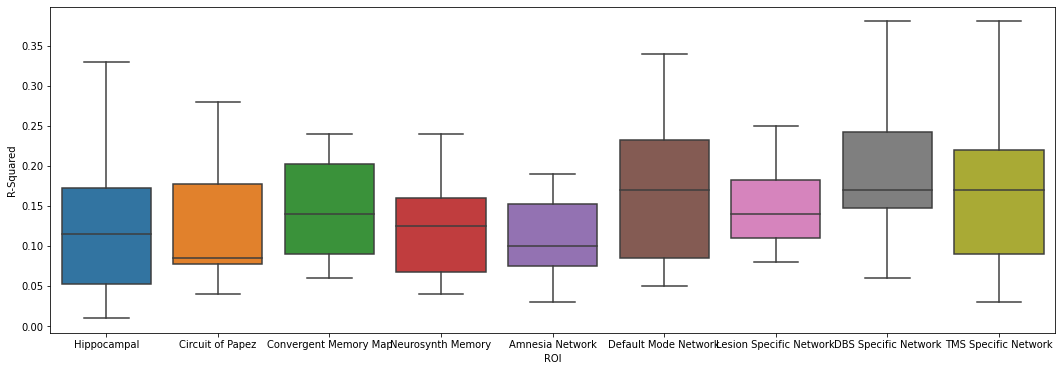

In [38]:
# df = pd.DataFrame(df).T.melt(var_name='Imaging Method', value_name='R-Squared', ignore_index=False).reset_index()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
# Create the bar plot with swapped grouping
plt.figure(figsize=(18, 6))
sns.set_palette("tab10")
sns.boxplot(x='variable', y='value', data=mdf)

# Customizing the plot
# plt.ylim(-0.3, 0.8)  # Adjust the y-axis limits as needed
plt.xlabel('ROI')
plt.ylabel('R-Squared')

# Save the plot as an SVG file
output_file_path = os.path.join(out_dir, 'boxplot.svg')
plt.savefig(output_file_path, format='svg')
# Show the plot (optional)
plt.show()

**Test the Box Plot**

In [39]:
mdf.columns

Index(['ROI', 'variable', 'value'], dtype='object')

In [41]:
from calvin_utils.statistical_utils.kruskall_wallis import KruskalWallisTest
kwt = KruskalWallisTest(data=mdf, value_column='value', group_column='variable')

Kruskal-Wallis Test Statistic: 10.9615
P-value: 0.2039
Conclusion: There is no statistically significant difference between groups.
